In [1]:
import pandas as pd

In [2]:
airbnb=pd.read_csv('./AB_NYC_2019.csv')
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

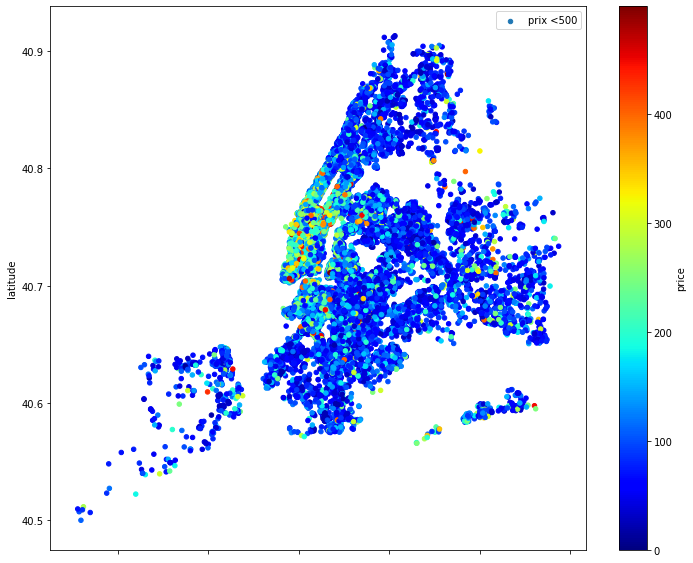

In [4]:
repartition1=airbnb[airbnb.price < 500]
fig1=repartition1.plot(kind='scatter', x='longitude', y='latitude', label='prix <500', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, figsize=(12,10))
fig1.legend()

In [5]:
import urllib

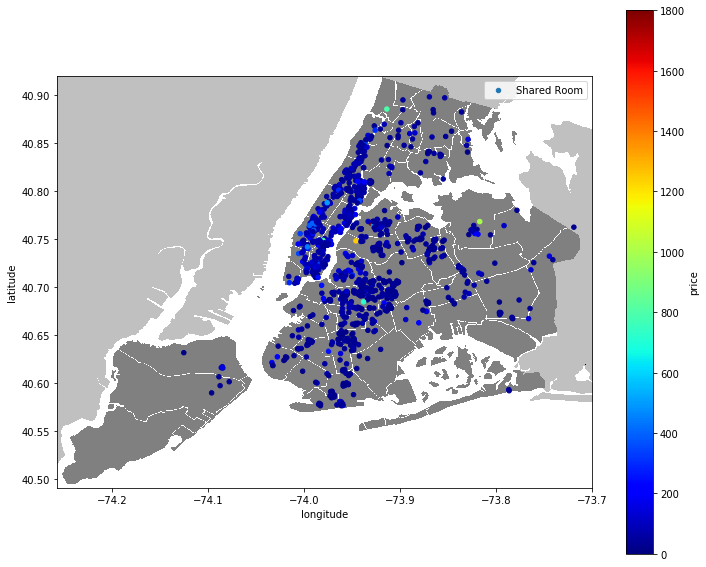

In [6]:
repartition2=airbnb[airbnb.room_type == "Shared room"]
plt.figure(figsize=(12,10))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
repartition2.plot(kind='scatter', x='longitude', y='latitude', label='Shared Room', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, zorder=5)
plt.legend()
plt.show()

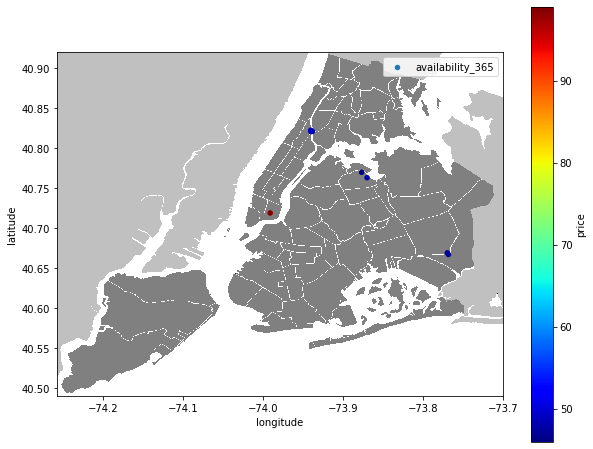

In [7]:
repartition3=airbnb[airbnb.number_of_reviews > 500]

plt.figure(figsize=(10,8))

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)

plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

repartition3.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, zorder=5)
plt.legend()
plt.show()

([<matplotlib.patches.Wedge at 0x2e3d74acf98>,
 [Text(-0.03834919972226283, 1.0993313144273942, 'Entire home/apt'),
  Text(-0.04494268322240838, -1.0990815052691818, 'Private room'),
  Text(1.0968465468388375, -0.08323252181520133, 'Shared room')],
 [Text(-0.020917745303052453, 0.5996352624149422, '51.1%'),
  Text(-0.024514190848586387, -0.5994990028740991, '46.5%'),
  Text(0.5982799346393659, -0.04539955735374618, '2.4%')])

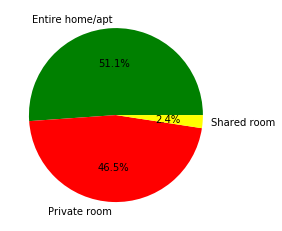

In [9]:
repartition3=airbnb[airbnb.price < 500]
roomdf = repartition3.groupby('room_type').size()/repartition3['room_type'].count()*100
labels = roomdf.index
plt.pie(roomdf,labels=labels, colors=["green","red","yellow"],autopct="%1.1f%%")

([<matplotlib.patches.Wedge at 0x2e3d76043c8>,
 [Text(1.0997559710137146, 0.023169035795258204, 'Bronx'),
  Text(0.818786924065603, 0.7345665204589633, 'Brooklyn'),
  Text(-0.9048480910537747, -0.6254997458963034, 'Manhattan'),
  Text(1.091638625916816, -0.1353702715017076, 'Queens'),
  Text(1.0998207130169784, -0.019859486872157092, 'Staten Island')],
 [Text(0.5998668932802079, 0.012637655888322654, '0.7%'),
  Text(0.44661104949032887, 0.40067264752307086, '21.9%'),
  Text(-0.49355350421114974, -0.34118167957980183, '74.0%'),
  Text(0.5954392505000814, -0.07383832991002232, '2.8%'),
  Text(0.59990220710017, -0.01083244738481296, '0.6%')])

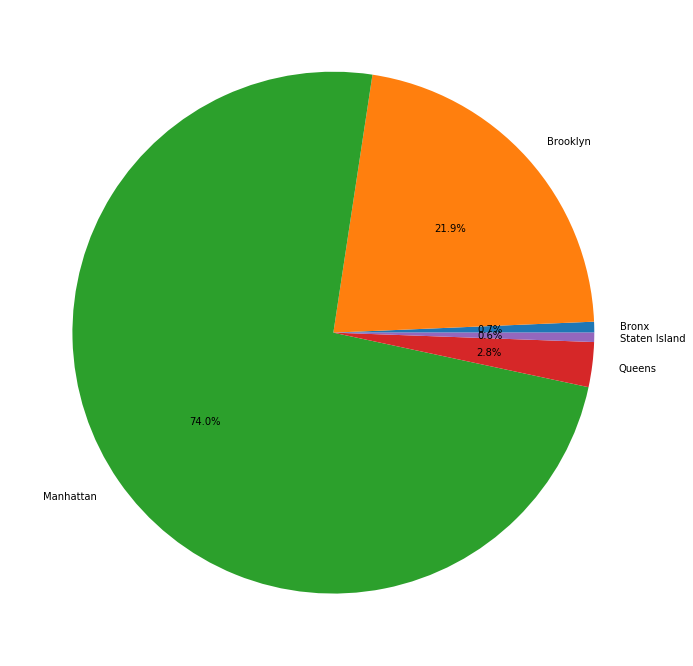

In [10]:
repartition4=airbnb[airbnb.price > 500]
roomdf = repartition4.groupby('neighbourhood_group').size()/repartition4['neighbourhood_group'].count()*100
labels = roomdf.index
plt.figure(figsize=(15,12))
plt.pie(roomdf,labels=labels,autopct="%1.1f%%")


([<matplotlib.patches.Wedge at 0x2e3d7a1d208>,
 [Text(1.0972034354310032, 0.07838763472898447, 'Bronx'),
  Text(0.13316065991134615, 1.091910362004123, 'Brooklyn'),
  Text(-0.6101472263509679, -0.9152706496857752, 'Manhattan'),
  Text(1.0046245785161059, -0.44802841008281685, 'Queens'),
  Text(1.0996781427443296, -0.02660793810842375, 'Staten Island')])

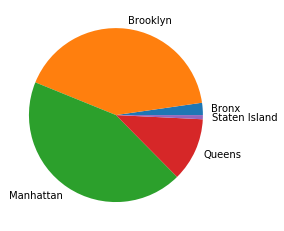

In [11]:
sub_6=airbnb[airbnb.price < 500]
roomdf = sub_6.groupby('neighbourhood_group').size()/sub_6['neighbourhood_group'].count()*100
labels = roomdf.index
plt.pie(roomdf,labels=labels)

In [12]:
airbnb[airbnb.neighbourhood_group == "Brooklyn"].price.mean()

124.38320732192598

In [13]:
airbnb[airbnb.neighbourhood_group == "Staten Island"].price.mean()

114.81233243967829

In [14]:
airbnb[airbnb.neighbourhood_group == "Manhattan"].price.mean()

196.8758136743456

In [15]:
airbnb[airbnb.neighbourhood_group == "Queens"].price.mean()

99.51764913519237

In [16]:
airbnb[airbnb.neighbourhood_group == "Bronx"].price.mean()

87.4967919340055

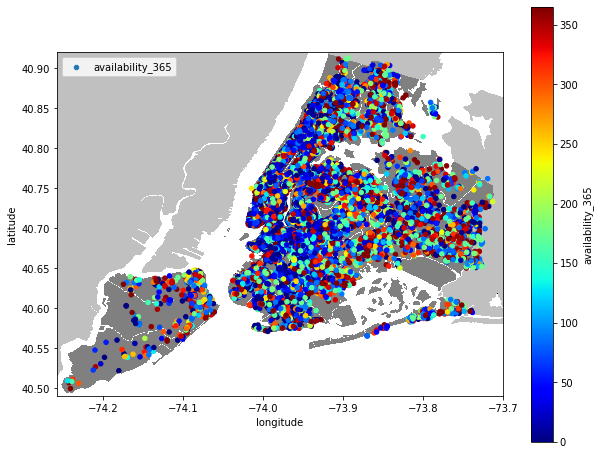

In [17]:
repartition5=airbnb
plt.figure(figsize=(10,8))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
repartition5.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='availability_365', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, zorder=5)
plt.legend()
plt.show()

<Figure size 1800x720 with 0 Axes>

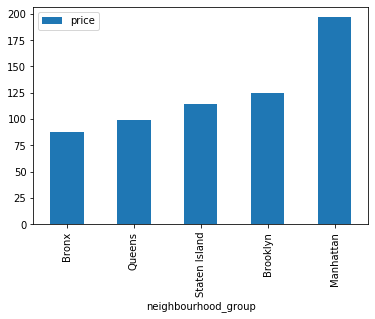

In [18]:
plt.figure(figsize=(25, 10))
df_top_prices_by_neighbourhood = airbnb.groupby('neighbourhood_group').agg({'price': 'mean'}).sort_values('price').reset_index()
df_top_prices_by_neighbourhood.plot(kind='bar', x='neighbourhood_group', y='price')